<a href="https://colab.research.google.com/github/nehadubey1205/NLP-college/blob/main/OriginalPaperWork_NehaDubey_016_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

import re 
import nltk 

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from nltk import sent_tokenize, word_tokenize
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer

from sklearn.model_selection import train_test_split
from time import time

import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from google.colab import files
from matplotlib import pyplot as plt
import pandas as pd
import io
from sklearn.metrics import classification_report
import pickle

In [20]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
data = pd.read_csv(r'/content/Bully_Sent_Emo_IEEEIC_6084.csv')

In [45]:
data.head()

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label
0,Teri maa ki chut me Shivsena ka lund gaya kya,Teri maa ki chut me Shivsena ka lund gaya kya,1,Negative,Anger
1,Han muje pata hai teri maa ka ke gufa me jati thi,Han muje pata hai teri maa ka ke gufa me jati thi,1,Negative,Others
2,Tum kaha se aa gye bhai tumlog toh saree pehen...,Tum kaha se aa gye bhai tumlog toh saree pehen...,0,Neutral,Others
3,Koi moti🙊kisi ki besti😁 baisn ka or channey ki...,Koi motikisi ki besti baisn ka or channey ki d...,1,Negative,Disgust
4,Rahul kanwal aaj nanga hoke road per nachega 😂,Rahul kanwal aaj nanga hoke road per nachega,1,Negative,Disgust


In [46]:
data = data.apply(lambda x: x.astype(str).str.lower())

In [47]:
data.head(2)

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label
0,teri maa ki chut me shivsena ka lund gaya kya,teri maa ki chut me shivsena ka lund gaya kya,1,negative,anger
1,han muje pata hai teri maa ka ke gufa me jati thi,han muje pata hai teri maa ka ke gufa me jati thi,1,negative,others


In [48]:
data['Sentiment_label'].value_counts()

negative    3227
positive    1530
neutral     1327
Name: Sentiment_label, dtype: int64

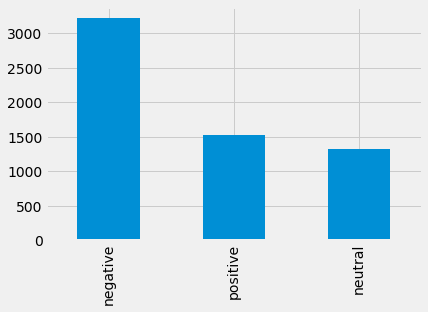

In [49]:
#data = data(np.random.rand(10, 4), columns=['Bully_Label',	'Sentiment_label','Emotion_label'])
df = pd.DataFrame(data, columns=['Bully_Label',	'Sentiment_label','Emotion_label'])
#df.plot(x="Emotion_label", y=['Bully_Label'], kind="bar", figsize=(9, 8))
#[1261]: df2.plot(kind='bar');


df['Sentiment_label'].value_counts().plot(kind='bar')

In [50]:
data['Bully_Label'].value_counts()# positive and neutral =0 , negative =1

1    3050
0    3034
Name: Bully_Label, dtype: int64

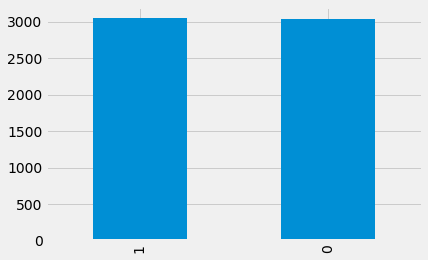

In [52]:
df['Bully_Label'].value_counts().plot(kind='bar')

In [53]:
df['Emotion_label'].value_counts()

others       1735
disgust      1678
happiness    1367
anger         900
sadness       254
surprise      114
fear           36
Name: Emotion_label, dtype: int64

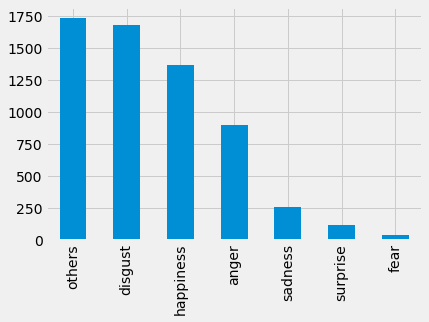

In [51]:
df['Emotion_label'].value_counts().plot(kind='bar')

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6084 entries, 0 to 6083
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Tweets            6084 non-null   object
 1   Processed_Tweets  6084 non-null   object
 2   Bully_Label       6084 non-null   object
 3   Sentiment_label   6084 non-null   object
 4   Emotion_label     6084 non-null   object
dtypes: object(5)
memory usage: 237.8+ KB


In [55]:
data.isnull().sum()

Tweets              0
Processed_Tweets    0
Bully_Label         0
Sentiment_label     0
Emotion_label       0
dtype: int64

In [56]:

from collections import Counter

Tweets = data.Tweets.str.cat(sep=' ') 

freq = Counter(Tweets.split()).most_common(25)
print(freq)

[('hai', 2248), ('ka', 1665), ('ki', 1641), ('to', 1526), ('ko', 1174), ('ke', 1131), ('teri', 1111), ('hi', 1090), ('maa', 1043), ('se', 971), ('bhi', 957), ('randi', 937), ('ho', 884), ('me', 786), ('aur', 774), ('khubsurat', 682), ('is', 681), ('k', 643), ('the', 629), ('nahi', 605), ('and', 574), ('ye', 558), ('beautiful', 555), ('tu', 541), ('a', 521)]


In [59]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 23.7 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=121bb136a6697cf2728fdd3595221c3e170d66f30f7b2eae84ab22d18bacf840
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [66]:
chars_hindi = [chr(c) for c in range(0x0900, 0x097f)]

In [68]:
df_hindi = data[data.Processed_Tweets.str.contains('|'.join(chars_hindi))]

In [69]:
df_hindi

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label,detect
44,कैसे हर बार बला की खूबसूरत लगती है @norafatehi...,कैसे हर बार बला की खूबसूरत लगती है वीडियो शेयर...,0,positive,happiness,id
47,fir hotay hi corona hogaya\naysay kitnay may...,fir hotay hi corona hogayaaysay kitnay may bik...,1,negative,disgust,id
83,"@rofl_annu good morning beautiful hair, \nतेरे...",good morning beautiful hair तेरे रूखसार पर बिख...,0,positive,happiness,id
92,@nijisachiv वफादारी किसी पार्टी विशेष के लिए न...,वफादारी किसी पार्टी विशेष के लिए नही अपने धर्म...,0,positive,happiness,id
105,"""my dear respected friends...!!\n~!!🌳🌺🌾beautif...","""my dear respected friends~beautiful good morn...",0,positive,happiness,id
...,...,...,...,...,...,...
5981,बेशक पेसे कमाओ....💵\n\nलेकीन.....✋🏻\n\nपेसे को...,बेशक पेसे कमाओलेकीन✋पेसे को देख कर आने वाली ओर...,1,negative,anger,id
6015,#newprofilepic2021 \nहम थे जिनके सहारे वो हुए...,newprofilepic2021 हम थे जिनके सहारे वो हुए न ह...,0,positive,sadness,id
6029,full on gyan baji ho rhi hai whtsp status me m...,full on gyan baji ho rhi hai whtsp status me m...,0,neutral,others,id
6038,भारत की इन जगहों के प्राकृतिक सौंदर्य को देखकर...,भारत की इन जगहों के प्राकृतिक सौंदर्य को देखकर...,0,positive,happiness,id


In [71]:
data.shape

(6084, 6)

In [82]:
line =  " अंदर अत अदि अप अपना अपनि अपनी अपने अभि अभी आदि आप इंहिं इंहें इंहों इतयादि इत्यादि इन इनका इन्हीं इन्हें इन्हों इस इसका इसकि इसकी इसके इसमें इसि इसी इसे उंहिं उंहें उंहों उन उनका उनकि उनकी उनके उनको उन्हीं उन्हें उन्हों उस उसके उसि उसी उसे एक एवं एस एसे ऐसे ओर और कइ कई कर करता करते करना करने करें कहते कहा का काफि काफ़ी कि किंहें किंहों कितना किन्हें किन्हों किया किर किस किसि किसी किसे की कुछ कुल के को कोइ कोई कोन कोनसा कौन कौनसा गया घर जब जहाँ जहां जा जिंहें जिंहों जितना जिधर जिन जिन्हें जिन्हों जिस जिसे जीधर जेसा जेसे जैसा जैसे जो तक तब तरह तिंहें तिंहों तिन तिन्हें तिन्हों तिस तिसे तो था थि थी थे दबारा दवारा दिया दुसरा दुसरे दूसरे दो द्वारा न नहिं नहीं ना निचे निहायत नीचे ने पर पहले पुरा पूरा पे फिर बनि बनी बहि बही बहुत बाद बाला बिलकुल भि भितर भी भीतर मगर मानो मे में यदि यह यहाँ यहां यहि यही या यिह ये रखें रवासा रहा रहे ऱ्वासा लिए लिये लेकिन व वगेरह वरग वर्ग वह वहाँ वहां वहिं वहीं वाले वुह वे वग़ैरह संग सकता सकते सबसे सभि सभी साथ साबुत साभ सारा से सो हि ही हुअ हुआ हुइ हुई हुए हे हें है हैं हो होता होति होती होते होना होने "

In [83]:
import nltk
nltk.download('punkt')
 
#string = "This is a sentence"
lst = nltk.word_tokenize(line)
print(lst)

['अंदर', 'अत', 'अदि', 'अप', 'अपना', 'अपनि', 'अपनी', 'अपने', 'अभि', 'अभी', 'आदि', 'आप', 'इंहिं', 'इंहें', 'इंहों', 'इतयादि', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकि', 'इसकी', 'इसके', 'इसमें', 'इसि', 'इसी', 'इसे', 'उंहिं', 'उंहें', 'उंहों', 'उन', 'उनका', 'उनकि', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसि', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'एसे', 'ऐसे', 'ओर', 'और', 'कइ', 'कई', 'कर', 'करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफि', 'काफ़ी', 'कि', 'किंहें', 'किंहों', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसि', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोइ', 'कोई', 'कोन', 'कोनसा', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जहां', 'जा', 'जिंहें', 'जिंहों', 'जितना', 'जिधर', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जेसा', 'जेसे', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिंहें', 'तिंहों', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थि', 'थी', 'थे', 'दबारा', 'दवा

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [87]:

data = data[~data.Tweets.str.contains('|'.join(lst))]
# through this , I have dropped all rows which was conatining devnagiri word

In [89]:
data.shape

(5753, 6)

In [94]:
data.tail()

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label,detect,clean_text,target
6078,@zaid078612 @ershikhaforbjp @bhupeshbaghel ter...,teri maa se bhi aise hi bolta h kya kuttiya h,1,negative,disgust,id,teri maa se bhi aise hi bolta h kya kuttiya h,4743
6079,dali sali kayo fhshdhdhdhd no need to follow m...,dali sali kayo fhshdhdhdhd no need to follow m...,0,neutral,others,id,dali sali kayo fhshdhdhdhd no need to follow m...,1379
6080,@anjalisingh_inc tum rajput pehle mugalon ka b...,tum rajput pehle mugalon ka bistar garm krti t...,1,negative,disgust,id,tum rajput pehle mugalon ka bistar garm krti t...,5074
6081,khatna pe to bol diya ek baat bata upar wala t...,khatna pe to bol diya ek baat bata upar wala t...,1,negative,others,id,khatna pe to bol diya ek baat bata upar wala t...,2607
6082,chal be bhadwe sanghi.. teri maa ki choot me g...,chal be bhadwe sanghi teri maa ki choot me gho...,1,negative,disgust,id,chal be bhadwe sanghi teri maa ki choot me gho...,1216


In [90]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('hinglish'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Link: https://github.com/NirantK/Hinglish/blob/master/ML%20Baselines/NB-SVM_and_LR-TF-IDF.ipynb

In [91]:
def cleaner(train):
    data["clean_text"] = data["Processed_Tweets"]
    data["clean_text"] = (
        (data["clean_text"])
        .apply(lambda text: re.sub(r"RT\s@\s\w+", "", text))
        .apply(lambda text: re.sub(r"@", "mention", text))
        .apply(lambda text: re.sub(r"#", "hashtag", text))
        .apply(lambda text: re.sub(r"http\S+", "", text))
    )

    le = LabelEncoder()
    data["target"] = le.fit_transform(data["Processed_Tweets"])
    print(f"Classes : {le.classes_}")
    X_train, X_test, y_train, y_test = train_test_split(
        train["clean_text"].values,
        train["target"].values,
        test_size=0.10,
        random_state=0,
    )

    vect = TfidfVectorizer(
        strip_accents="unicode",
        ngram_range=(1, 2),
        max_df=0.75,
        min_df=3,
        sublinear_tf=True,
    )

    tfidf_train = vect.fit_transform(X_train)
    tfidf_test = vect.transform(X_test)

    return X_train, X_test, y_train, y_test, tfidf_train, tfidf_test, le.classes_

In [93]:
%time X_train, X_test, y_train, y_test, tfidf_train, tfidf_test, label_classes = cleaner(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

Classes : ['" \' "woo tumhaari soch gandi hai isi liye tumhe woo randi lgti hai'
 '" raaste khubsurat ha tumhare sath manzil ki filhal baat nahi karte'
 '"aaj tumhe vo khubsurat lag rahe hai kuch din ruko tumhe unki khub saari surate dikhai degi"'
 ...
 '❤️❤️❤️ beautiful songpar sochne wali baat ye hai ki iske jaise ko bhi gf mil gyi sach mei ghor kaliyug hai'
 "ㅤㅤㅤㅤwell all jokes aside part 'to ng plano ko i want you to focus on the links and combine themㅤㅤafter that go to the platform where you asked if you can court me it's an invite link sali ka lang ㅤㅤi'll be waiting there jaan ^^ㅤㅤ"
 '️maa toh jannat ka phool hai️piyaar krna uska asuul haiduniya ki muhabbat fazul haimaa ki hr dua qabuul h…']
CPU times: user 334 ms, sys: 20.6 ms, total: 355 ms
Wall time: 369 ms


NAIVE BAYES

In [99]:
import string
import warnings

from scipy import sparse
from sklearn import metrics
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import check_is_fitted, check_X_y





In [100]:
class NbSvmClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, C=1.0, dual=False, n_jobs=1):
        self.C = C
        self.dual = dual
        self.n_jobs = n_jobs

    def predict(self, x):
        # Verify that model has been fit
        check_is_fitted(self, ["_r", "_clf"])
        return self._clf.predict(x.multiply(self._r))

    def predict_proba(self, x):
        # Verify that model has been fit
        check_is_fitted(self, ["_r", "_clf"])
        return self._clf.predict_proba(x.multiply(self._r))

    def fit(self, x, y):
        # Check that X and y have correct shape
        x, y = check_X_y(x, y, accept_sparse=True)

        def pr(x, y_i, y):
            p = x[y == y_i].sum(0)
            return (p + 1) / ((y == y_i).sum() + 1)

        self._r = sparse.csr_matrix(np.log(pr(x, 1, y) / pr(x, 0, y)))
        x_nb = x.multiply(self._r)
        self._clf = LogisticRegression(
            C=self.C, dual=self.dual, n_jobs=self.n_jobs
        ).fit(x_nb, y)
        return self

In [101]:
NBSVM = NbSvmClassifier(C=4, dual=False, n_jobs=-1)

In [102]:
def evaluate(model, tfidf_train, tfidf_test, y_train, y_test, s=None, with_noisy_labels= False):

    scores = cross_val_score(
        model, tfidf_train, y_train, cv=5, scoring="f1_macro"
    )
    print(f"Cross Validation Scores {scores}")
    
    if with_noisy_labels : 
        _ = model.fit(tfidf_train, s)
    else:
        _ = model.fit(tfidf_train, y_train)
    pred = model.predict(tfidf_test)
    print("Valid accuracy:", round(accuracy_score(pred, y_test), 5))
    print("Valid f1_score:", round(f1_score(pred, y_test, average="macro"), 5))
    cm = confusion_matrix(pred, y_test)
    print_confusion_matrix(cm, class_names=label_classes)

In [103]:
evaluate(NBSVM, tfidf_train, tfidf_test, y_train, y_test)

ValueError: ignored